# Titanic
Kaggle: https://www.kaggle.com/c/titanic
## Import packages and read data

In [63]:
from sklearn import preprocessing 
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

%matplotlib inline
pd.options.mode.chained_assignment = None

train = pd.read_csv("Titanic/train.csv")
test = pd.read_csv("Titanic/test.csv")
submit = pd.read_csv('Titanic/gender_submission.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

In [64]:
# show name, unique values, type, number of missing value and value samples of each col
for col in train.columns:
    uniques = train[col].unique()
    print('{0:20s} {1:5d} {2:8s} {3:5d} '.format(col, len(uniques), 
                                                 str(train[col].dtypes), 
                                                 train[col].isnull().sum()), uniques[:5])

PassengerId            891 int64        0  [1 2 3 4 5]
Survived                 2 int64        0  [0 1]
Pclass                   3 int64        0  [3 1 2]
Name                   891 object       0  ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry']
Sex                      2 object       0  ['male' 'female']
Age                     89 float64    177  [22. 38. 26. 35. nan]
SibSp                    7 int64        0  [1 0 3 4 2]
Parch                    7 int64        0  [0 1 2 5 3]
Ticket                 681 object       0  ['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450']
Fare                   248 float64      0  [ 7.25   71.2833  7.925  53.1     8.05  ]
Cabin                  148 object     687  [nan 'C85' 'C123' 'E46' 'G6']
Embarked                 4 object       2  ['S' 'C' 'Q' nan]


## Relation Exploration for Numerical Variables

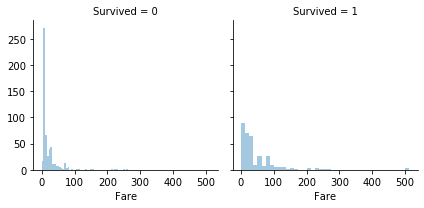

In [65]:
f = sns.FacetGrid(train, col='Survived')
f.map(sns.distplot, 'Fare', kde=False)

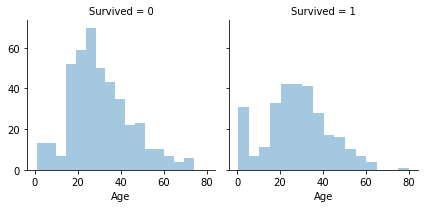

In [66]:
g = sns.FacetGrid(train, col='Survived')
g.map(sns.distplot, 'Age', kde = False)

## Relation Exploration for categorical features

Text(0.5, 1.0, 'Count plot of Embarked/Survived')

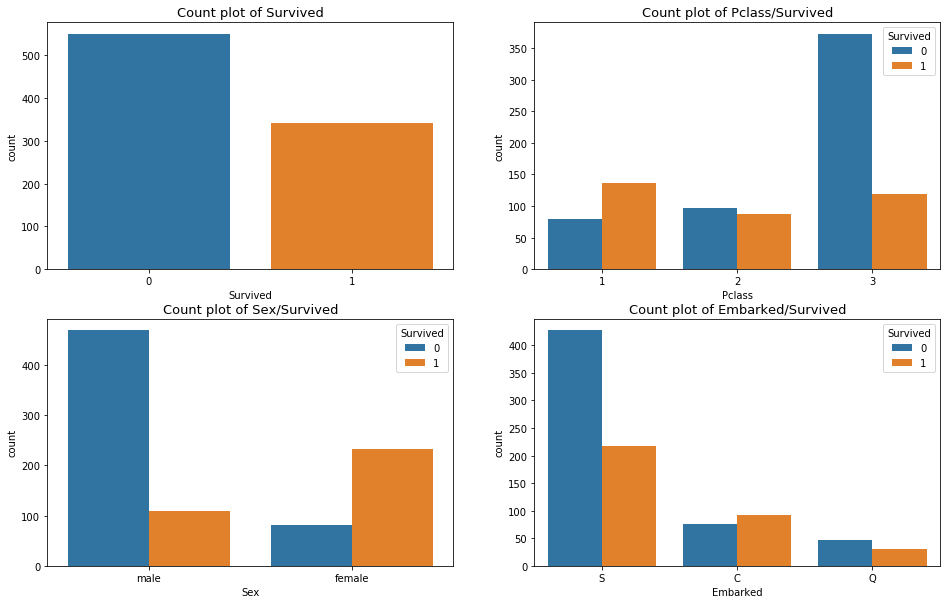

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))

# Count plot of Survived
sns.countplot(train['Survived'], ax=ax[0][0])
ax[0][0].set_title('Count plot of Survived', fontsize=13)

# Count plot of Pclass/Survived
sns.countplot(train['Pclass'], hue=train['Survived'], ax=ax[0][1])
ax[0][1].set_title('Count plot of Pclass/Survived', fontsize=13)

# Count plot of Sex/Survived
sns.countplot(train['Sex'], hue=train['Survived'], ax=ax[1][0])
ax[1][0].set_title('Count plot of Sex/Survived', fontsize=13)

#scatter plot grlivarea/saleprice
sns.countplot(train['Embarked'], hue=train['Survived'], ax=ax[1][1])
ax[1][1].set_title('Count plot of Embarked/Survived', fontsize=13)

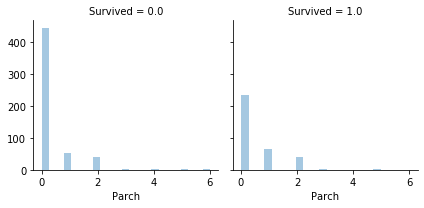

In [68]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

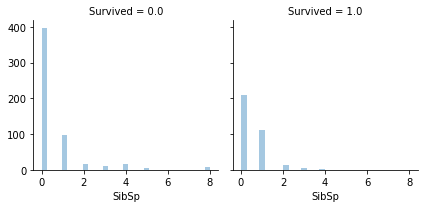

In [69]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

## Feature Engineering

In [70]:
# combine and do feature engineering
data = train.append(test, ignore_index = True)
data['Family_Size'] = data['Parch'] + data['SibSp']

# clean title
data['Title1'] = data['Name'].str.split(", ", expand=True)[1]
data['Name'].str.split(", ",expand = True).head(3)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina


In [71]:
data['Title1'] = data['Title1'].str.split(".", expand = True)[0]
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [72]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [73]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [74]:
data.groupby(['Title1'])['Age'].mean()

Title1
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: Age, dtype: float64

In [75]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1        Pclass
Capt          1         70.000000
Col           1         54.000000
Don           1         40.000000
Dona          1         39.000000
Dr            1         45.600000
              2         38.500000
Jonkheer      1         38.000000
Lady          1         48.000000
Major         1         48.500000
Master        1          6.984000
              2          2.757273
              3          6.090000
Miss          1         30.338983
              2         20.717083
              3         17.360874
Mlle          1         24.000000
Mme           1         24.000000
Mr            1         41.450758
              2         32.346715
              3         28.318910
Mrs           1         43.208955
              2         33.518519
              3         32.326531
Ms            2         28.000000
              3               NaN
Rev           2         41.250000
Sir           1         49.000000
the Countess  1         33.000000
Name: Age, dtype: float64

In [76]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady',
                                         'the Countess','Jonkheer','Col','Rev',
                                         'Capt','Sir','Don','Dona'],
                                        ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs',
                                         'Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [77]:
data.groupby('Title2')['Age'].mean()

Title2
Master     5.482642
Miss      21.824366
Mr        32.811056
Mrs       36.971264
Name: Age, dtype: float64

In [78]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.865714
        3         17.360874
Mr      1         42.241497
        2         32.914966
        3         28.318910
Mrs     1         42.802817
        2         33.518519
        3         32.326531
Name: Age, dtype: float64

In [79]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [80]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r') 
#Checking the Initials with the Sex

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [81]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] 
                                           if not x.isdigit() else 'X')
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

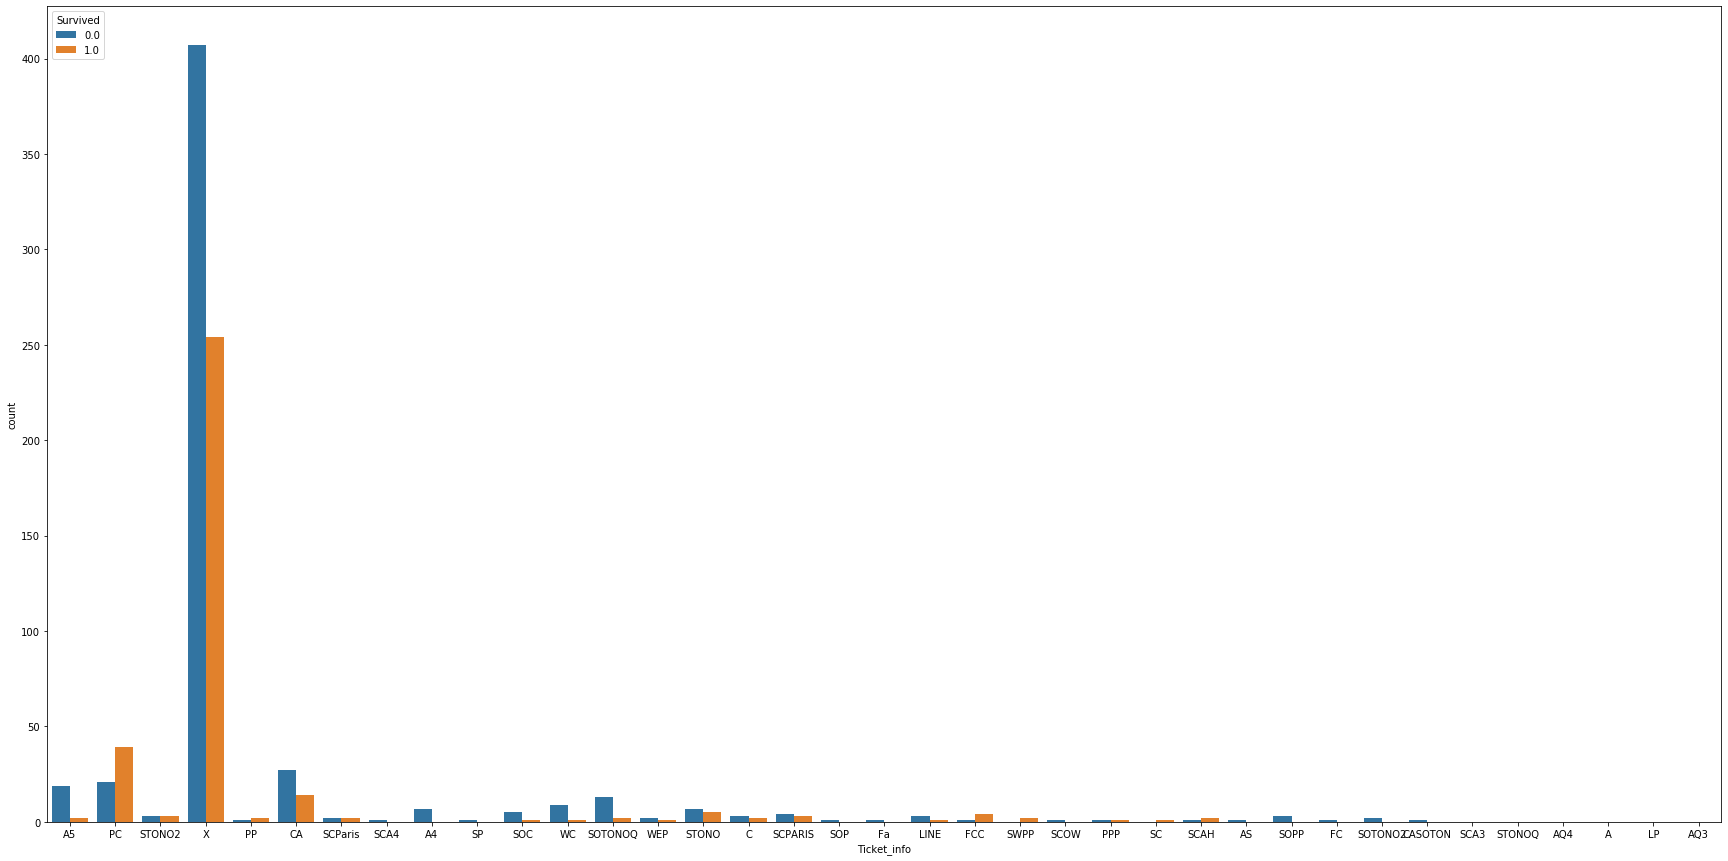

In [82]:
plt.figure(figsize=(30,15))
sns.countplot(data['Ticket_info'], hue=data['Survived'])

In [83]:
# Missing Value-embarked、Fare

data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [84]:
data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [85]:
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

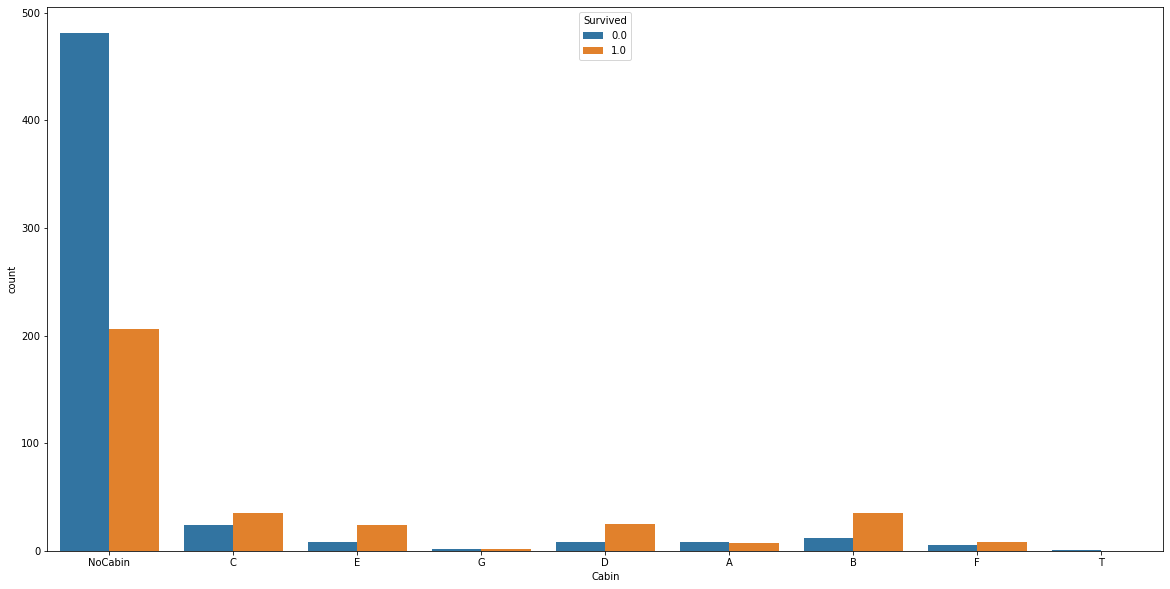

In [86]:
plt.figure(figsize=(20,10))
sns.countplot(data['Cabin'], hue=data['Survived'])

## Preparing for modelling

In [90]:
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

dataAgeNull = data[data["Age"].isnull()]
dataAgeNotNull = data[data["Age"].notnull()]
remove_outlier = dataAgeNotNull[(np.abs(dataAgeNotNull["Fare"]-dataAgeNotNull["Fare"].mean())>(4*dataAgeNotNull["Fare"].std()))|(np.abs(dataAgeNotNull["Family_Size"]-dataAgeNotNull["Family_Size"].mean())>(4*dataAgeNotNull["Family_Size"].std()))]
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2','Cabin','Ticket_info']

from sklearn.ensemble import RandomForestRegressor
# do a model to predict ages

rf_random_grid =  {'oob_score': [True, False],
                   'bootstrap': [True, False],
                   'n_estimators': [ 1000, 1500, 2000, 2500],
                   'min_samples_split': [3, 5, 7, 9, 11],
                   'min_samples_leaf': [3, 5, 7, 9, 11],
                   'max_features' : ['auto', 'sqrt', 'log2'],
                   'ccp_alpha': [0.1 , 0, 0.5, 0.8, 1]
                }
rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), param_distributions = rf_random_grid, 
                               n_iter=20, cv=3, verbose=2, random_state=42)
rf_random.fit(remove_outlier[ageColumns], remove_outlier["Age"])

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bootstrap=True, ccp_alpha=0, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=2000, oob_score=True; total time=   2.2s
[CV] END bootstrap=True, ccp_alpha=0, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=2000, oob_score=True; total time=   1.9s
[CV] END bootstrap=True, ccp_alpha=0, max_features=sqrt, min_samples_leaf=5, min_samples_split=7, n_estimators=2000, oob_score=True; total time=   1.9s
[CV] END bootstrap=False, ccp_alpha=0.8, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=2500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, ccp_alpha=0.8, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=2500, oob_score=True; total time=   0.0s
[CV] END bootstrap=False, ccp_alpha=0.8, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=2500, oob_score=True; total time=   0.0s
[CV] END bootst

[CV] END bootstrap=True, ccp_alpha=0.8, max_features=log2, min_samples_leaf=11, min_samples_split=9, n_estimators=2500, oob_score=False; total time=   2.1s
[CV] END bootstrap=False, ccp_alpha=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1500, oob_score=False; total time=   1.1s
[CV] END bootstrap=False, ccp_alpha=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1500, oob_score=False; total time=   0.9s
[CV] END bootstrap=False, ccp_alpha=1, max_features=sqrt, min_samples_leaf=3, min_samples_split=5, n_estimators=1500, oob_score=False; total time=   1.0s
[CV] END bootstrap=True, ccp_alpha=1, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=1000, oob_score=False; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=1, max_features=auto, min_samples_leaf=3, min_samples_split=11, n_estimators=1000, oob_score=False; total time=   0.9s
[CV] END bootstrap=True, ccp_alpha=1, max_features=auto, min_samples_leaf=

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'ccp_alpha': [0.1, 0, 0.5, 0.8, 1],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [3, 5, 7, 9, 11],
                                        'min_samples_split': [3, 5, 7, 9, 11],
                                        'n_estimators': [1000, 1500, 2000,
                                                         2500],
                                        'oob_score': [True, False]},
                   random_state=42, verbose=2)

In [94]:
rfModel_age = rf_random.best_estimator_
ageNullValues = rfModel_age.predict(X= dataAgeNull[ageColumns])
dataAgeNull.loc[0:,"Age"] = ageNullValues
data = dataAgeNull.append(dataAgeNotNull)
data.reset_index(inplace=True, drop=True)

In [100]:
from sklearn.model_selection import train_test_split

dataTrain = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
dataTest = data[~pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
cols = ['Survived', 'Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 
        'Family_Size', 'Title2','Ticket_info','Cabin']

x_train, x_test, y_train, y_test = train_test_split(dataTrain[cols].drop('Survived', axis=1), 
                                                    dataTrain['Survived'], 
                                                    test_size=0.3,
                                                    random_state=42)

## Modelling

In [102]:
from sklearn.ensemble import GradientBoostingClassifier

GBR_random_grid =  {'learning_rate': [.001, .01, .1, 1],
                    'loss': ['deviance', 'exponential'],
                    'n_estimators': [500, 1000, 1500, 2000],
                    'min_samples_split': [3, 5, 7, 9, 11],
                    'max_features' : ['auto', 'sqrt', 'log2'],
                    'max_depth': [5, 10, 15, 20],
                    'ccp_alpha': [0.1 , 0, 0.5, 0.8, 1]
                     }
GBR_random = RandomizedSearchCV(estimator = GradientBoostingClassifier(), param_distributions = GBR_random_grid, 
                                  n_iter = 20, cv = 3, verbose=2, random_state=42)
GBR_random.fit(x_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ccp_alpha=0.8, learning_rate=1, loss=deviance, max_depth=10, max_features=auto, min_samples_split=7, n_estimators=1500; total time=   1.2s
[CV] END ccp_alpha=0.8, learning_rate=1, loss=deviance, max_depth=10, max_features=auto, min_samples_split=7, n_estimators=1500; total time=   1.1s
[CV] END ccp_alpha=0.8, learning_rate=1, loss=deviance, max_depth=10, max_features=auto, min_samples_split=7, n_estimators=1500; total time=   1.2s
[CV] END ccp_alpha=0.1, learning_rate=0.01, loss=exponential, max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END ccp_alpha=0.1, learning_rate=0.01, loss=exponential, max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END ccp_alpha=0.1, learning_rate=0.01, loss=exponential, max_depth=15, max_features=sqrt, min_samples_split=3, n_estimators=500; total time=   0.4s
[CV] END ccp_alpha=0.5, learning_rat

[CV] END ccp_alpha=0.5, learning_rate=0.01, loss=deviance, max_depth=20, max_features=log2, min_samples_split=9, n_estimators=2000; total time=   1.1s
[CV] END ccp_alpha=0.5, learning_rate=0.01, loss=deviance, max_depth=20, max_features=log2, min_samples_split=9, n_estimators=2000; total time=   1.1s
[CV] END ccp_alpha=0, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1000; total time=   0.8s
[CV] END ccp_alpha=0, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1000; total time=   0.7s
[CV] END ccp_alpha=0, learning_rate=1, loss=deviance, max_depth=5, max_features=sqrt, min_samples_split=5, n_estimators=1000; total time=   0.7s


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=20,
                   param_distributions={'ccp_alpha': [0.1, 0, 0.5, 0.8, 1],
                                        'learning_rate': [0.001, 0.01, 0.1, 1],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_split': [3, 5, 7, 9, 11],
                                        'n_estimators': [500, 1000, 1500,
                                                         2000]},
                   random_state=42, verbose=2)

In [103]:
GBS = GBR_random.best_estimator_
GBS.fit(x_train, y_train)
accuracy_score(y_test, GBS.predict(x_test))

0.8171641791044776

## Do prediction on test data

In [108]:
dataTest = dataTest[['Age', 'Embarked', 'Fare',  'Pclass', 'Sex', 'Family_Size', 'Title2','Ticket_info','Cabin']]
pred = GBS.predict(dataTest)
submit = pd.read_csv('titanic/submit.csv')
submit['Survived'] = pred 
submit['Survived'] = submit['Survived'].apply(lambda x : int(x))
submit.to_csv('titanic/submit.csv', index = False)
print("Completed")

Completed
